In [10]:
import numpy as np
import os
import cv2
from tensorflow.keras import applications, models, layers
import matplotlib.pyplot as plt

In [31]:
# 데이터 전처리
def get_data(path):
    x = []
    y = []
    dir_list = os.listdir(path)
    for i in range(len(dir_list)-1):
        dir_path = path + "/" + dir_list[i+1]
        dir_name = os.listdir(dir_path)

        for j in range(len(dir_name)):
            full_dir_path = dir_path + "/" + dir_name[j]

            img = cv2.imread(full_dir_path)
            img = cv2.resize(img, (200,200))
            x.append(img)
            y.append(i)
    # print(x)
    # print(y)
    return np.array(x),np.array(y)

# 모델 생성
def make_model() :
    resnet50 = applications.resnet50.ResNet50(include_top=False, weights="imagenet", input_shape=(200,200,3))
    resnet50.trainable = False
    model = models.Sequential()
    model.add(resnet50)
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation="relu"))
    model.add(layers.Dense(512, activation="relu"))

    # 분류 데이터가 몇종류인지
    model.add(layers.Dense(2, activation="softmax"))
    model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])
    print(model.summary())
    return model

# 모델 학습
def learning() :
    train_path = "./data_image"
    test_path = "./test"
    (x_train, y_train)= get_data(train_path)
    (x_test, y_test) = get_data(test_path)
    model = make_model()
    # print("x_train : ",x_train[0])
    # print("x_train.shape : ",x_train[0].shape)
    log = model.fit(x_train, y_train, epochs=2, batch_size=16)
    #model.save("face.h5")
    
    model.evaluate(x_test,y_test)

In [32]:
train_path = "./data_image"
test_path = "./test"
(x_train, y_train)= get_data(train_path)
(x_test, y_test) = get_data(test_path)
model = make_model()
# print("x_train : ",x_train[0])
# print("x_train.shape : ",x_train[0].shape)
log = model.fit(x_train, y_train, epochs=10, batch_size=16)
#model.save("face.h5")

test_loss, test_acc = model.evaluate(x_test,y_test)

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: './data_image'

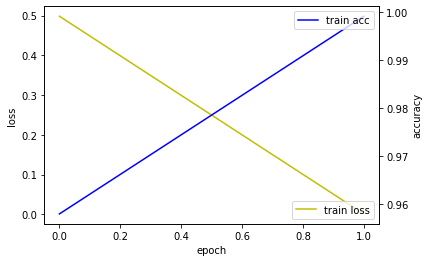

In [13]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx() 
loss_ax.plot(log.history['loss'], 'y', label='train loss') 
acc_ax.plot(log.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch') 
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper right')
plt.show()

TypeError: 'AxesSubplot' object is not subscriptable

<Figure size 432x288 with 0 Axes>

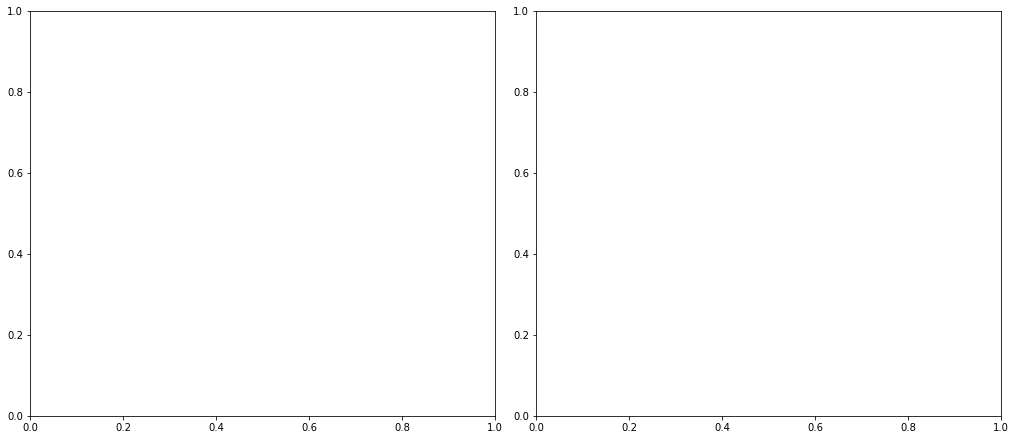

In [43]:
fig = plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(14,6) , constrained_layout=True)
ax[0][0].plot(log.history['loss'], label = "train")
ax[0][0].plot(log.history['test_loss'], label = "test")
ax[0][0].set_title("model loss")
ax[0][0].set_xlabel("epoch")
ax[0][0].set_ylabel("loss")
ax[0][0].legend(loc='best')

ax[0][1].plot(log.history['accuracy'], label = "test")
ax[0][1].plot(log.history['test_accuracy'], label = "test")
ax[0][1].set_title("model accuracy")
ax[0][1].set_xlabel("epoch")
ax[0][1].set_ylabel("accuracy")
ax[0][1].legend(loc='best')
plt.show()


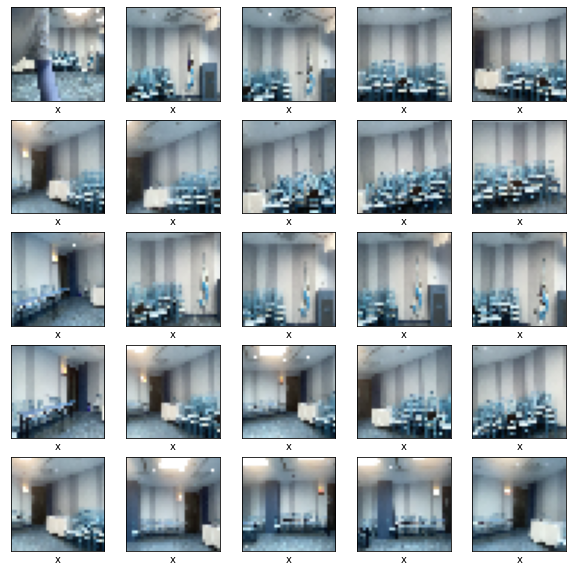

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i*9], cmap=plt.cm.binary)
  plt.xlabel("x")
plt.show()

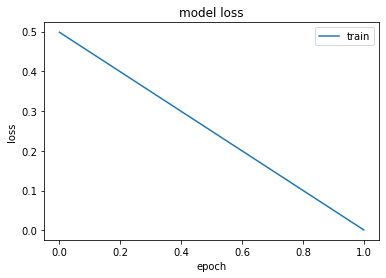

{'loss': [0.4984061121940613, 0.0009753277408890426],
 'accuracy': [0.9580364227294922, 0.9992082118988037]}

In [30]:
# loss
plt.plot(log.history['loss'])
# plt.plot(log.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc=0)
plt.show()

log.history